# Stage Analysis

In this notebook I analyze the time the program takes for each stage of the algorithm.
Here you will find the 3 versions:

1. Sequential
2. Parallel THR (Native C++ Threads)
3. Parallel FF (using Fast Flow Lib)


In [1]:
from b_tools.preprocess import get_standardized_measures

### Sequential

In [2]:
# Choose the file
SEQ_RESULT_FILE="results/sequential_100.csv"

In [3]:
seq = get_standardized_measures(SEQ_RESULT_FILE)

In [4]:
seq.describe()

,READING,HUFFBUILD,ENCODING,WRITING,TOTAL
count,5.000000e+00,5.000000,5.000000e+00,5.000000e+00,5.000000e+00
mean,1.170446e+08,64026.800000,1.211129e+08,1.640116e+08,4.022332e+08
std,1.759827e+06,2322.128377,1.019539e+06,6.367883e+06,5.704205e+06
min,1.159667e+08,62449.000000,1.202753e+08,1.603429e+08,3.981920e+08
25%,1.159849e+08,62467.000000,1.204208e+08,1.612521e+08,3.982759e+08
50%,1.160417e+08,63030.000000,1.208712e+08,1.612917e+08,3.996650e+08
75%,1.171716e+08,64209.000000,1.211771e+08,1.618078e+08,4.032891e+08
max,1.200581e+08,67979.000000,1.228201e+08,1.753637e+08,4.117437e+08


In [5]:
seq_stages = list(seq.columns)
seq_stages.remove('TOTAL')
seq_means = [seq[stage].mean() for stage in seq_stages]

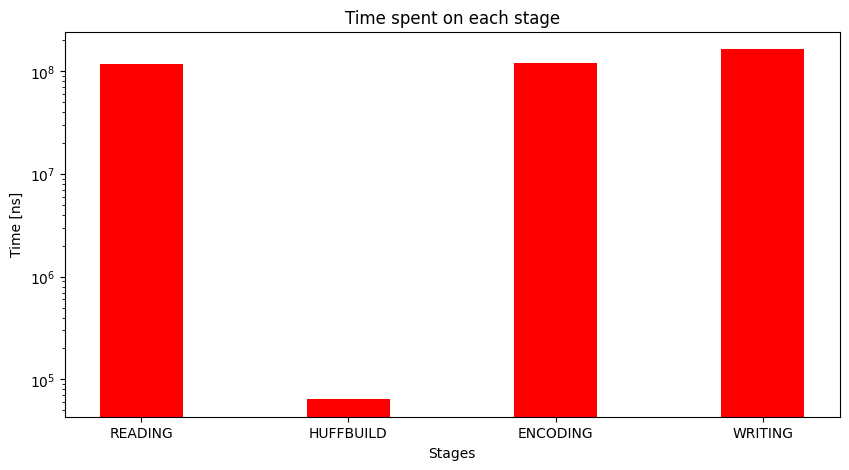

In [6]:
import matplotlib.pyplot as plt 
 
fig = plt.figure(figsize = (10, 5))
plt.bar(seq_stages, seq_means, color='red', width=0.4)
 
plt.xlabel("Stages")
plt.ylabel("Time [ns]")
plt.yscale('log')
plt.title("Time spent on each stage")
plt.show()

## Parallel (THR)

In [7]:
thr = get_standardized_measures('results/thr_100.csv', excluded_columns=['P_DEGREE'])

In [8]:
def plot_for_p(p_degree, data):
    thr_data = data[data['P_DEGREE'] == p_degree]
    thr_stages = list(thr_data.columns)
    thr_stages.remove('TOTAL')
    thr_stages.remove('P_DEGREE')
    thr_means = [seq[stage].mean() for stage in thr_stages]
    fig = plt.figure(figsize = (10, 5))
    plt.bar(thr_stages, thr_means, color='blue', width=0.4)
    plt.xlabel("Stages")
    plt.ylabel("Time [ns]")
    plt.yscale('log')
    plt.title("Time spent on each stage")
    plt.show()

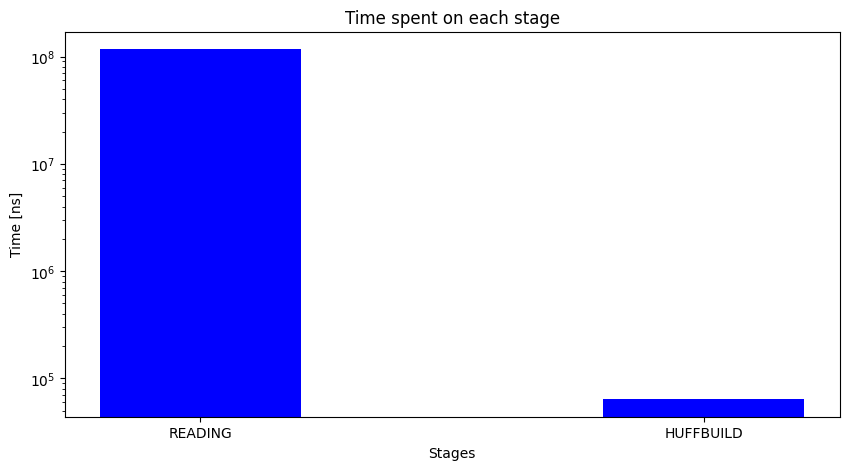

In [10]:
plot_for_p(11, thr)